Import Library

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import minmax_scale, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from typing import Tuple, List
from numpy.typing import NDArray

In [21]:
encoder = OneHotEncoder(sparse_output=False)

def encode(y: NDArray) -> NDArray:
    """
    Metode untuk melakukan encoding menggunakan encoder yang diinisialisasi di awal.
    Metode ini mengubah representasi int menjadi encoded OneHotEncoder.
    """
    return encoder.fit_transform(y.reshape(-1, 1))

def decode(y: NDArray) -> NDArray:
    """
    Metode untuk melakukan decoding menggunakan encoder yang diinisialisasi di awal.
    Metode ini mengubah representasi encoded OneHotEncoder menjadi int.
    """
    return encoder.inverse_transform(y).astype(int)

In [22]:
def sigmoid(x: NDArray) -> NDArray:
    """
    Metode untuk menghitung fungsi sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x: NDArray) -> NDArray:
    """
    Metode untuk menghitung turunan dari fungsi sigmoid.
    """
    return x * (1 - x)

In [23]:
def bp_fit(
    X: NDArray,
    Y: NDArray,
    layer_conf: Tuple[int, int, int] = (4, 4, 3),
    learn_rate: float = 0.1,
    max_epoch: int = 1000,
    max_error: float = 0.01,
    print_per_epoch: int = 50
) -> Tuple[
    Tuple[NDArray, NDArray, NDArray, NDArray],
    int,
    float,
    List[float]
]:
    """
    Melakukan fitting data dengan metode Backpropagation sesuai materi yang diberikan.
    Terdiri dari proses:
    1. Penentuan bobot dan bias awal.
    2. Proses feed-forward.
    3. Proses perhitungan error.
    4. Proses back-propagation.
    5. Proses update weight dan bias.
    6. Pelanjutan proses iterasi.

    Parameters
    ----------
    X : NDArray
        Berisi data input fitur yang akan dilatih. Setiap kolom merepresentasikan satu fitur.
    Y : NDArray
        Berisi label target yang merepresentasikan satu kelas-kelas output.
    layer_conf : Tuple[int, int, int], optional
        Konfigurasi jumlah neuron pada setiap layer dalam format (input_size, hidden_size, output_size).
        Default (4, 4, 3) untuk dataset Iris dengan 4 fitur, 4 neuron hidden layer, dan 3 kelas output.
    learn_rate : float, optional
        Parameter learning rate untuk update bobot dan bias. Defaultnya 0.1.
    max_epoch : int, optional
        Jumlah maksimum epoch (iterasi) untuk pelatihan. Default 1000.
    max_error : float, optional
        Batas error minimum (threshold) untuk early stopping.
        Pelatihan akan berhenti jika MSE < max_error. Defaultnya 0.01.
    print_per_epoch : int, optional
        Helper interval epoch untuk mencetak progress pelatihan. Default 50.
    """
    input_size, hidden_size, output_size = layer_conf
    np.random.seed(1)
    w1 = np.random.rand(input_size, hidden_size)
    b1 = np.random.rand(1, hidden_size)
    w2 = np.random.rand(hidden_size, output_size)
    b2 = np.random.rand(1, output_size)

    # List untuk menyimpan hasil MSE perhitungan dari setiap epoch
    # MSE (Mean Squared Error)
    mse_list = []

    for epoch in range(1, max_epoch + 1):
        # Input Forward / Feed Forward
        z1 = np.dot(X, w1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, w2) + b2
        a2 = sigmoid(z2)

        # Menghitung Error
        error = Y - a2
        mse = np.mean(np.square(error))
        mse_list.append(mse)

        # Backpropagation
        delta2 = error * sigmoid_deriv(a2)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)

        delta1 = np.dot(delta2, w2.T) * sigmoid_deriv(a1)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)

        # Update Bobot dan Bias
        w2 += learn_rate * dw2
        b2 += learn_rate * db2
        w1 += learn_rate * dw1
        b1 += learn_rate * db1

        if epoch % print_per_epoch == 0 or mse < max_error:
            print(f'Epoch {epoch}, MSE: {mse:.4f}')
        if mse < max_error:
            print("")
            break

    return (w1, b1, w2, b2), epoch, mse, mse_list

In [24]:
def bp_predict(
    X: NDArray,
    w: Tuple[NDArray, NDArray, NDArray, NDArray]
) -> NDArray:
    """
    Melakukan prediksi dengan weights dan bias pada Tuple w.
    """
    w1, b1, w2, b2 = w
    a1 = sigmoid(np.dot(X, w1) + b1)
    a2 = sigmoid(np.dot(a1, w2) + b2)
    return a2

Load Data Iris dari package datasets

In [25]:
iris = datasets.load_iris()
X_raw = iris.data
y_raw = iris.target

Preprocess Data

In [26]:
X = minmax_scale(X_raw)
Y = encode(y_raw)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Membentuk Model

In [28]:
w, ep, mse, mse_list = bp_fit(X_train, y_train, layer_conf=(4, 4, 3), learn_rate=0.1)

Epoch 50, MSE: 0.0983
Epoch 100, MSE: 0.0897
Epoch 150, MSE: 0.0482
Epoch 200, MSE: 0.0182
Epoch 250, MSE: 0.0131
Epoch 300, MSE: 0.0110
Epoch 335, MSE: 0.0100



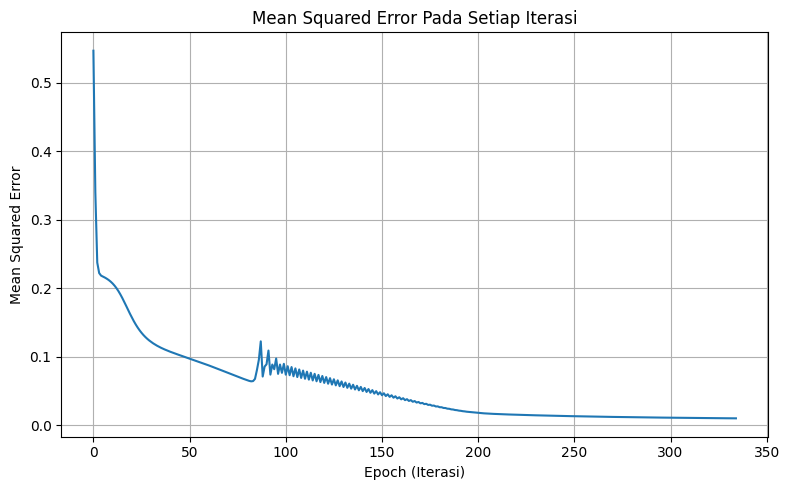

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(mse_list)
plt.title('Mean Squared Error Pada Setiap Iterasi')
plt.xlabel('Epoch (Iterasi)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.tight_layout()
plt.show()

Menguji Model

In [30]:
output = bp_predict(X_test, w)
predicted = decode(output)

Membandingkan Luaran Dengan Target

In [31]:
true = decode(y_test)

print(f'Output: {predicted.flatten()}')
print(f'True:   {true.flatten()}')
print(f'Accuracy: {accuracy_score(true, predicted):.2f}')

Output: [2 1 1 2 1 0 1 0 0 2 2 2 0 1 2 0 1 0 1 2 2 1 2 0 2 1 0 0 0 2 2 2 2 1 1 1 2
 1 0 2 0 0 0 2 1]
True:   [2 1 1 2 1 0 1 0 0 2 2 2 0 1 2 0 1 0 1 1 2 1 2 0 2 1 0 0 0 2 2 2 2 1 1 2 1
 1 0 2 0 0 0 2 1]
Accuracy: 0.93


Prediksi, Identifikasi, Klasifikasi data baru(tunggal)

In [32]:
irisBaru = np.array([[6.7, 3.3, 5.7, 2.5]])
irisBaru_scaled = minmax_scale(irisBaru)
outBaru = bp_predict(irisBaru_scaled, w)
print(f'Hasil Prediksi: {decode(outBaru).flatten()}')

Hasil Prediksi: [0]


In [37]:
print("\nNormalisasi Dengan Min-Max")
X_z = minmax_scale(X_raw)
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(X_z, Y, test_size=0.3)
w_z, _, _, _ = bp_fit(X_train_z, y_train_z, layer_conf=(4, 4, 3))
output_z = bp_predict(X_test_z, w_z)
acc_z = accuracy_score(decode(y_test_z), decode(output_z))
print(f'Min-Max Accuracy: {acc_z:.2f}')


Normalisasi Dengan Min-Max
Epoch 50, MSE: 0.0983
Epoch 100, MSE: 0.0897
Epoch 150, MSE: 0.0482
Epoch 200, MSE: 0.0182
Epoch 250, MSE: 0.0131
Epoch 300, MSE: 0.0110
Epoch 335, MSE: 0.0100

Min-Max Accuracy: 0.93


Dengan Normalisasi Z-Score

In [33]:
print("\nNormalisasi Dengan Z-Score")
scaler = StandardScaler()
X_z = scaler.fit_transform(X_raw)
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(X_z, Y, test_size=0.3)
w_z, _, _, _ = bp_fit(X_train_z, y_train_z, layer_conf=(4, 4, 3))
output_z = bp_predict(X_test_z, w_z)
acc_z = accuracy_score(decode(y_test_z), decode(output_z))
print(f'Z-Score Accuracy: {acc_z:.2f}')


Normalisasi Dengan Z-Score
Epoch 50, MSE: 0.0300
Epoch 100, MSE: 0.0153
Epoch 150, MSE: 0.0119
Epoch 200, MSE: 0.0104
Epoch 218, MSE: 0.0100

Z-Score Accuracy: 0.98


K-Fold Cross Validation, dengan split sebanyak 5


In [34]:
print("\nK-Fold Cross Validation (k=5)")
kf = KFold(n_splits=5, shuffle=True, random_state=1)
acc_scores = []

for train_idx, test_idx in kf.split(X):
    X_tr, X_te = X[train_idx], X[test_idx]
    y_tr, y_te = Y[train_idx], Y[test_idx]
    w_kf, _, _, _ = bp_fit(X_tr, y_tr, layer_conf=(4, 4, 3))
    out_kf = bp_predict(X_te, w_kf)
    acc = accuracy_score(decode(y_te), decode(out_kf))
    acc_scores.append(acc)

print(f'K-Fold Mean Accuracy: {np.mean(acc_scores):.2f}')


K-Fold Cross Validation (k=5)
Epoch 50, MSE: 0.1020
Epoch 100, MSE: 0.0912
Epoch 150, MSE: 0.0600
Epoch 200, MSE: 0.0275
Epoch 250, MSE: 0.0178
Epoch 300, MSE: 0.0157
Epoch 350, MSE: 0.0145
Epoch 400, MSE: 0.0137
Epoch 450, MSE: 0.0130
Epoch 500, MSE: 0.0126
Epoch 550, MSE: 0.0122
Epoch 600, MSE: 0.0119
Epoch 650, MSE: 0.0117
Epoch 700, MSE: 0.0115
Epoch 750, MSE: 0.0113
Epoch 800, MSE: 0.0112
Epoch 850, MSE: 0.0110
Epoch 900, MSE: 0.0109
Epoch 950, MSE: 0.0108
Epoch 1000, MSE: 0.0108
Epoch 50, MSE: 0.0971
Epoch 100, MSE: 0.0910
Epoch 150, MSE: 0.0626
Epoch 200, MSE: 0.0356
Epoch 250, MSE: 0.0207
Epoch 300, MSE: 0.0179
Epoch 350, MSE: 0.0163
Epoch 400, MSE: 0.0151
Epoch 450, MSE: 0.0143
Epoch 500, MSE: 0.0136
Epoch 550, MSE: 0.0131
Epoch 600, MSE: 0.0127
Epoch 650, MSE: 0.0123
Epoch 700, MSE: 0.0120
Epoch 750, MSE: 0.0118
Epoch 800, MSE: 0.0116
Epoch 850, MSE: 0.0114
Epoch 900, MSE: 0.0113
Epoch 950, MSE: 0.0112
Epoch 1000, MSE: 0.0111
Epoch 50, MSE: 0.0990
Epoch 100, MSE: 0.0868
Epoc

Mencoba variasi dari hidden layer

In [35]:
print("\n[INFO] Trying multiple hidden layer sizes")
nr_of_layer = 0
biggest = 0
accuracies = []
hidden_sizes = []
for h in range(0, 50, 2):
    print(f'Hidden layer: {h}')
    w_h, _, _, _ = bp_fit(X_train, y_train, layer_conf=(4, h, 3))
    out_h = bp_predict(X_test, w_h)
    acc_h = accuracy_score(decode(y_test), decode(out_h))
    accuracies.append(acc_h)
    hidden_sizes.append(h)

    if acc_h > biggest:
        biggest = acc_h
        nr_of_layer = h

    print(f'Accuracy: {acc_h:.2f}\n')

print(f'Best accuracy: {biggest:.2f} with {nr_of_layer} hidden layers')


[INFO] Trying multiple hidden layer sizes
Hidden layer: 0
Epoch 50, MSE: 0.2222
Epoch 100, MSE: 0.2222
Epoch 150, MSE: 0.2222
Epoch 200, MSE: 0.2222
Epoch 250, MSE: 0.2222
Epoch 300, MSE: 0.2222
Epoch 350, MSE: 0.2222
Epoch 400, MSE: 0.2222
Epoch 450, MSE: 0.2222
Epoch 500, MSE: 0.2222
Epoch 550, MSE: 0.2222
Epoch 600, MSE: 0.2222
Epoch 650, MSE: 0.2222
Epoch 700, MSE: 0.2222
Epoch 750, MSE: 0.2222
Epoch 800, MSE: 0.2222
Epoch 850, MSE: 0.2222
Epoch 900, MSE: 0.2222
Epoch 950, MSE: 0.2222
Epoch 1000, MSE: 0.2222
Accuracy: 0.31

Hidden layer: 2
Epoch 50, MSE: 0.1184
Epoch 100, MSE: 0.0890
Epoch 150, MSE: 0.0603
Epoch 200, MSE: 0.0715
Epoch 250, MSE: 0.0215
Epoch 300, MSE: 0.0130
Epoch 350, MSE: 0.0108
Epoch 381, MSE: 0.0100

Accuracy: 0.89

Hidden layer: 4
Epoch 50, MSE: 0.0983
Epoch 100, MSE: 0.0897
Epoch 150, MSE: 0.0482
Epoch 200, MSE: 0.0182
Epoch 250, MSE: 0.0131
Epoch 300, MSE: 0.0110
Epoch 335, MSE: 0.0100

Accuracy: 0.93

Hidden layer: 6
Epoch 50, MSE: 0.1064
Epoch 100, MSE: 0.

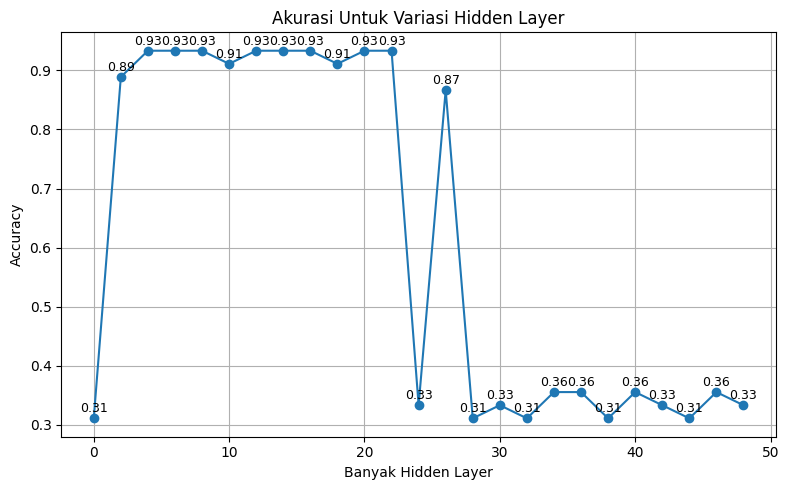

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(hidden_sizes, accuracies, marker='o')
plt.title('Akurasi Untuk Variasi Hidden Layer')
plt.xlabel('Banyak Hidden Layer')
plt.ylabel('Accuracy')
plt.grid(True)

for i, acc in enumerate(accuracies):
    plt.text(hidden_sizes[i], acc + 0.01, f'{acc:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()